# Heart Disease Prediction System
## Business Problem
The healthcare industry is facing a significant challenge in preventing heart disease, which is one of the leading causes of death globally. Despite advancements in medical science, predicting and preventing heart disease remains difficult due to the complexity and multitude of contributing factors. For healthcare providers, there is a pressing need to identify high-risk individuals early on to provide timely intervention and reduce the overall incidence and costs associated with heart disease management. The goal is to develop a predictive model that can accurately identify individuals at high risk for heart disease based on available health data, enabling healthcare providers to implement targeted prevention strategies and optimize resource allocation.
### Key Questions
- How can healthcare providers use predictive analytics to prioritize patients for early intervention and tailored treatment plans?
- How can we leverage existing health data to accurately predict the risk of heart disease in individuals?

In [79]:
#Import necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pickle

df = pd.read_csv('Heart Disease.csv')

## Data Loading and Initial Exploration
We have successfully loaded the dataset, which contains information about 319,795 individuals across 18 features related to their health.

In [80]:
# Look at the data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [81]:
# See information on data shape and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [82]:
# See numerical information
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


- The dataset is free of missing values, and we observe a mix of categorical and numerical features. The next step is to check the distribution of some key variables.

In [83]:
# Look to see if there is any missing data
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Data Visualization
Here we visualize the distribution of key numerical variables like BMI, Physical Health, Mental Health, and Sleep Time. Additionally, we explore the relationship between categorical variables and heart disease.

### Distribution of Numerical Features
The histograms below show the distribution of BMI, Physical Health, Mental Health, and Sleep Time across the dataset.

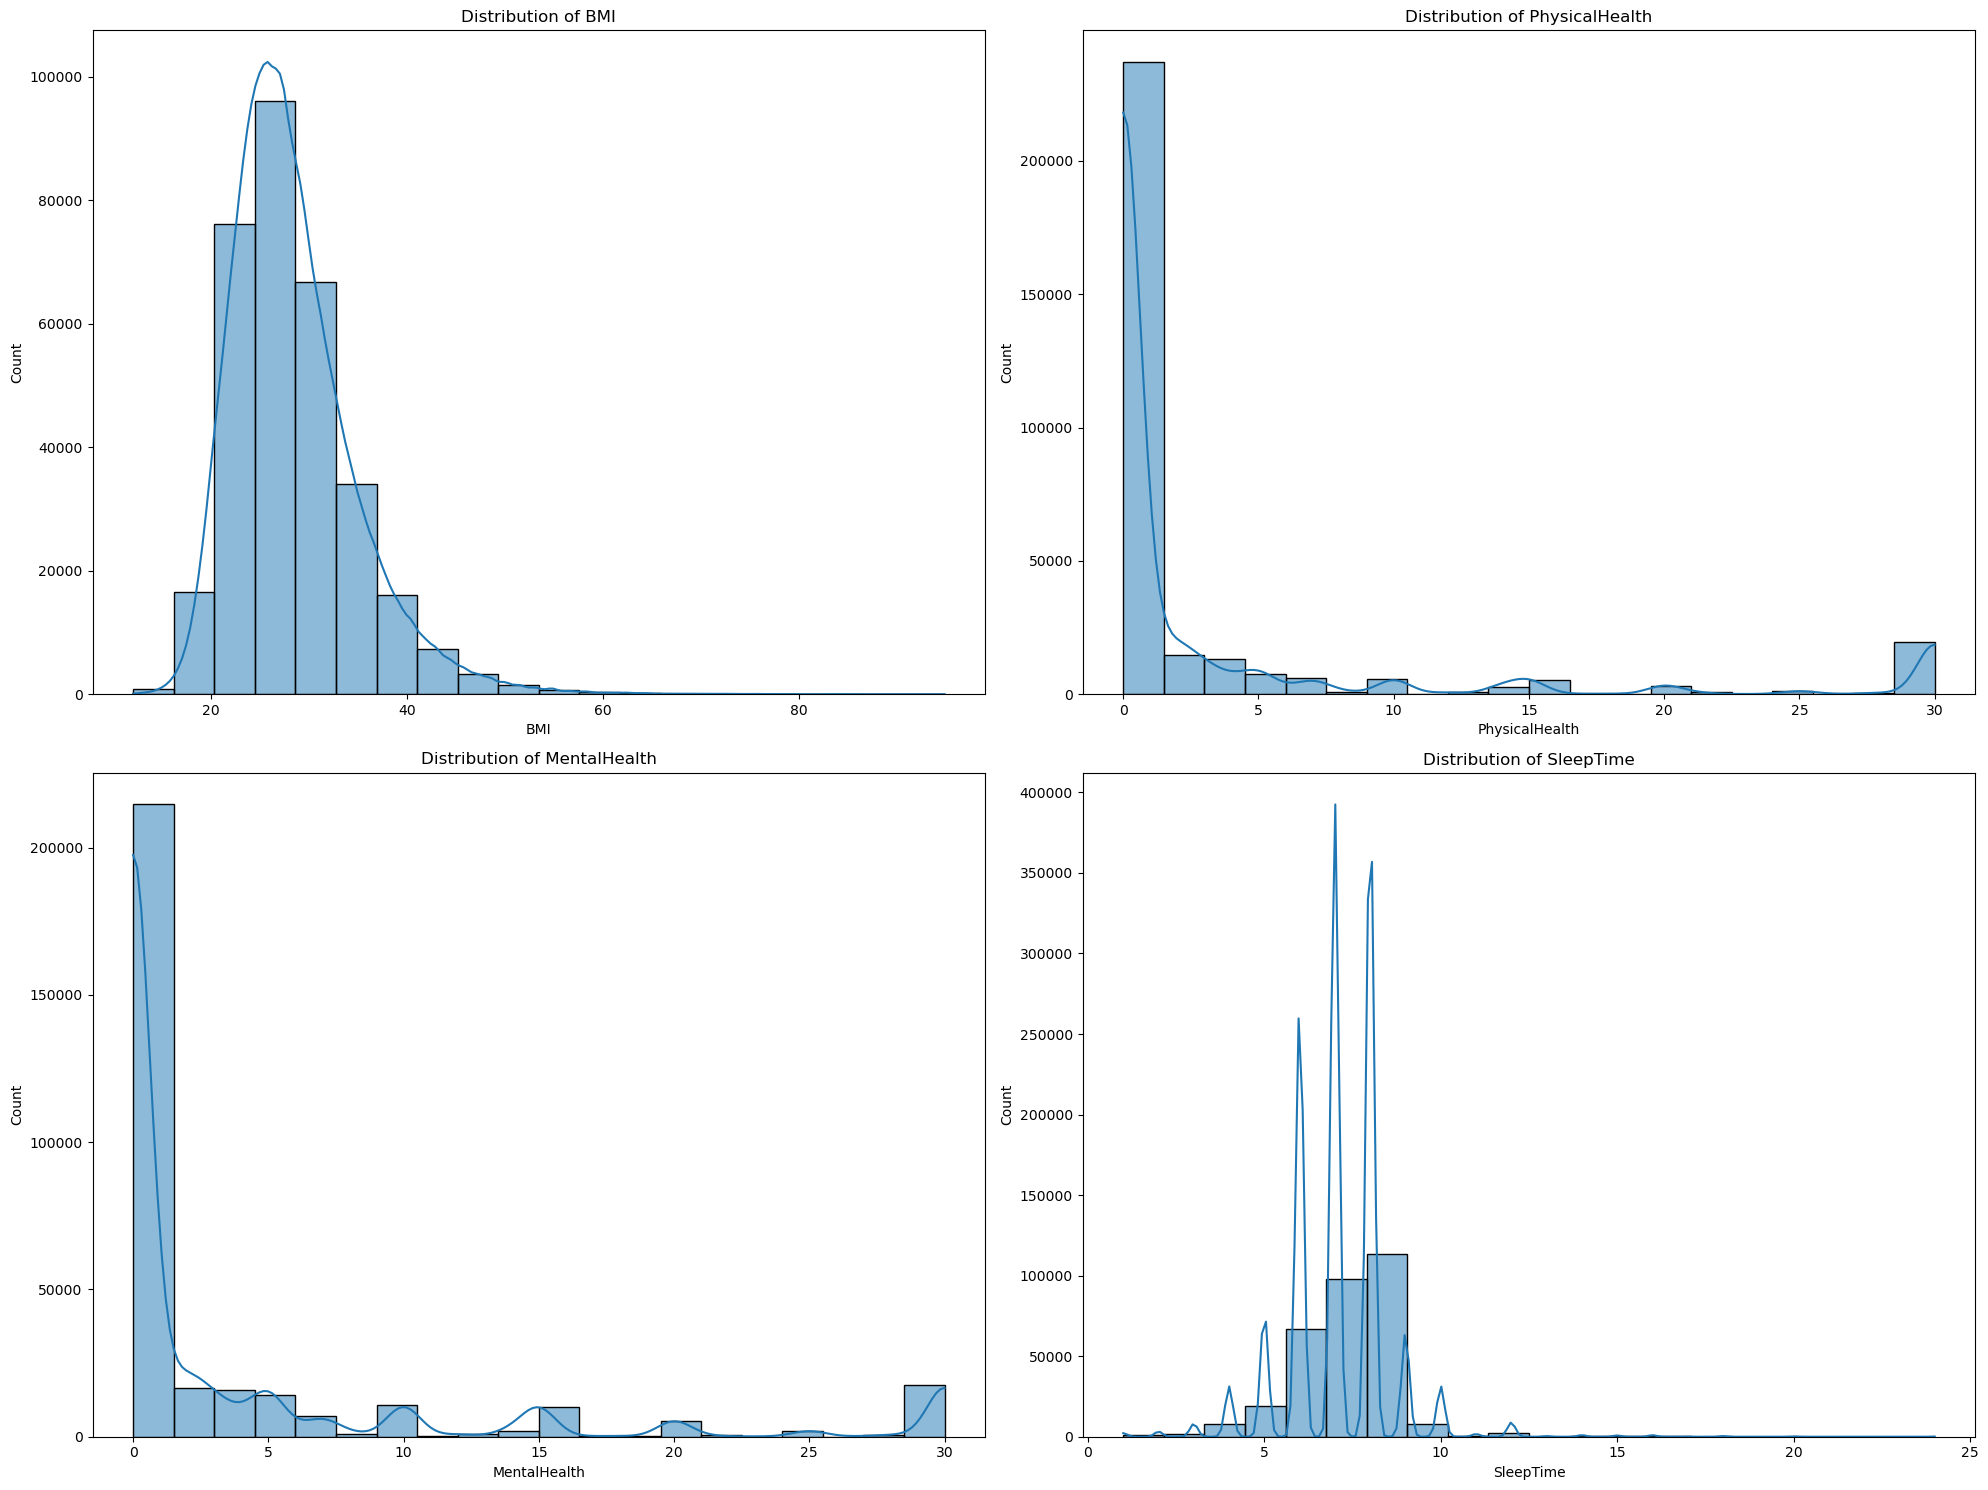

In [84]:
plt.figure(figsize=(20, 15))

# Distribution plots for numerical columns
plt.subplot(2, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title('Distribution of BMI')

plt.subplot(2, 2, 2)
sns.histplot(df['PhysicalHealth'], kde=True, bins=20)
plt.title('Distribution of PhysicalHealth')

plt.subplot(2, 2, 3)
sns.histplot(df['MentalHealth'], kde=True, bins=20)
plt.title('Distribution of MentalHealth')

plt.subplot(2, 2, 4)
sns.histplot(df['SleepTime'], kde=True, bins=20)
plt.title('Distribution of SleepTime')

plt.tight_layout()
plt.show()

### Categorical Features vs. Heart Disease
The bar plots below depict the distribution of various categorical features like Smoking, Alcohol Drinking, and Stroke against the presence of heart disease.

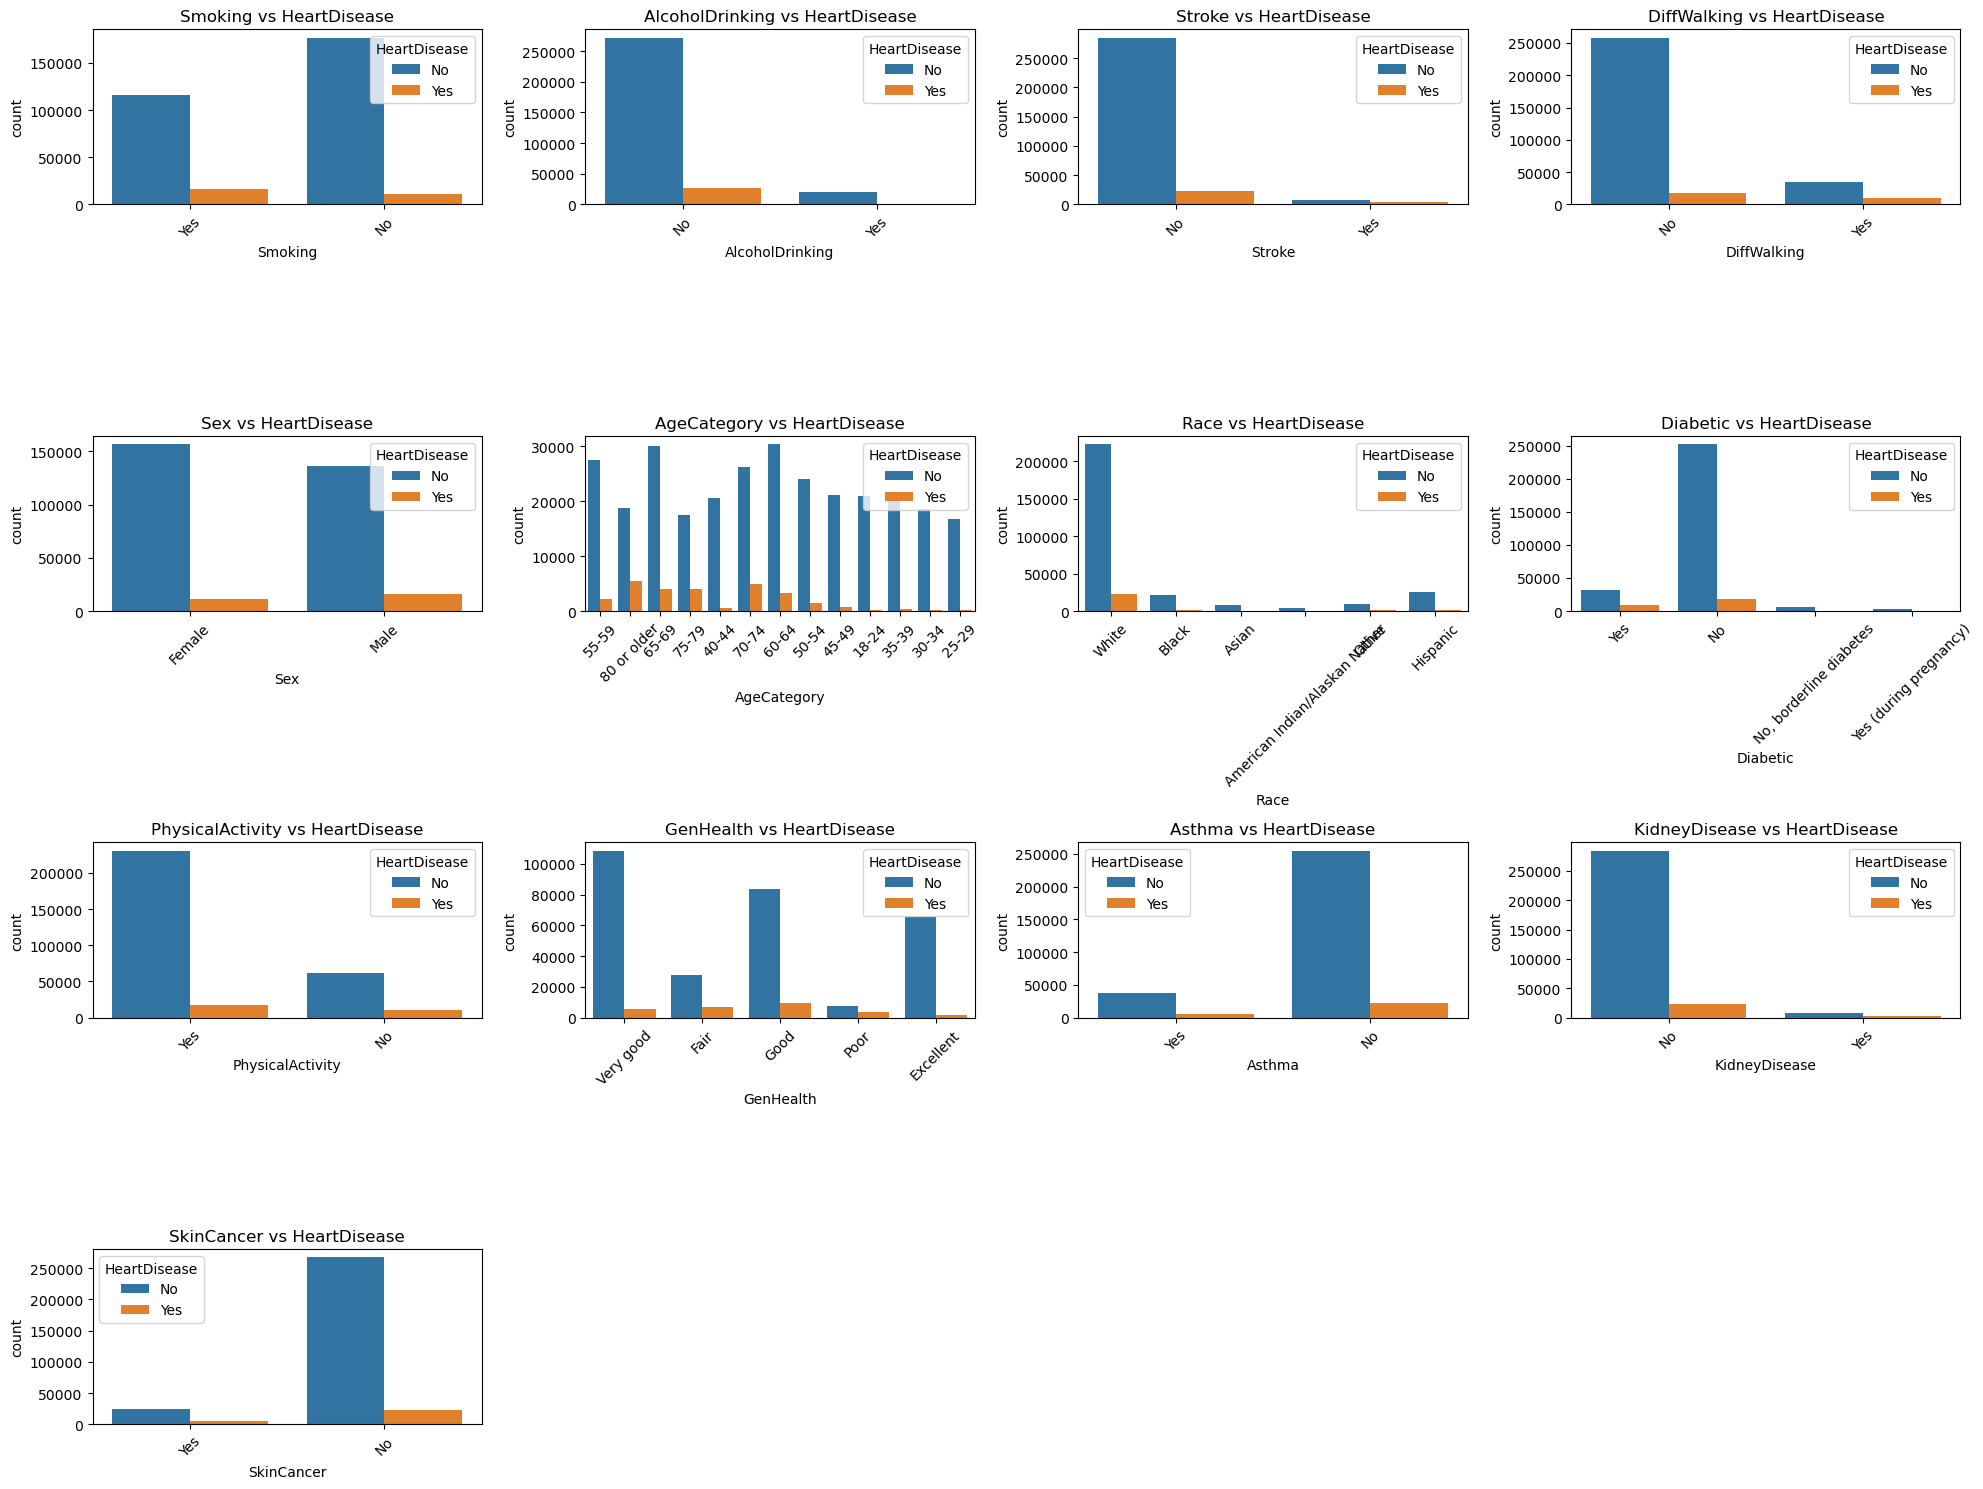

In [85]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Bar plots for categorical columns against HeartDisease
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=column, hue='HeartDisease')
    plt.title(f'{column} vs HeartDisease')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

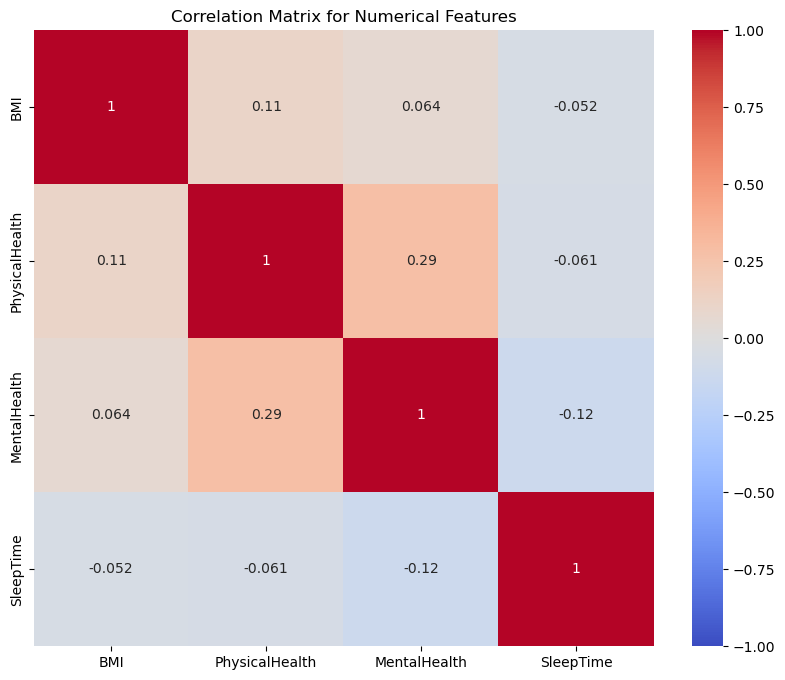

In [86]:
# Correlation matrix and heatmap for numerical features
correlation_matrix = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

### Resampling to Balance the Dataset
We downsample the majority class ('No') to match the minority class ('Yes'), ensuring a balanced dataset for modeling.

In [87]:
# Separate majority and minority classes
df_majority = df[df['HeartDisease'] == 'No']
df_minority = df[df['HeartDisease'] == 'Yes']

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123)  

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority, df_majority_downsampled])


# Display new class counts
df_balanced['HeartDisease'].value_counts()

Yes    27373
No     27373
Name: HeartDisease, dtype: int64

In [88]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 5 to 104542
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  object 
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  object 
 3   AlcoholDrinking   54746 non-null  object 
 4   Stroke            54746 non-null  object 
 5   PhysicalHealth    54746 non-null  int64  
 6   MentalHealth      54746 non-null  int64  
 7   DiffWalking       54746 non-null  object 
 8   Sex               54746 non-null  object 
 9   AgeCategory       54746 non-null  object 
 10  Race              54746 non-null  object 
 11  Diabetic          54746 non-null  object 
 12  PhysicalActivity  54746 non-null  object 
 13  GenHealth         54746 non-null  object 
 14  SleepTime         54746 non-null  int64  
 15  Asthma            54746 non-null  object 
 16  KidneyDisease     54746 non-null  objec

In [89]:
df_balanced.to_csv('sampled_data')

### Visualizations of the balanced data
Now we can look at how  the balanced data is distributed to get a better understanding of the relationships

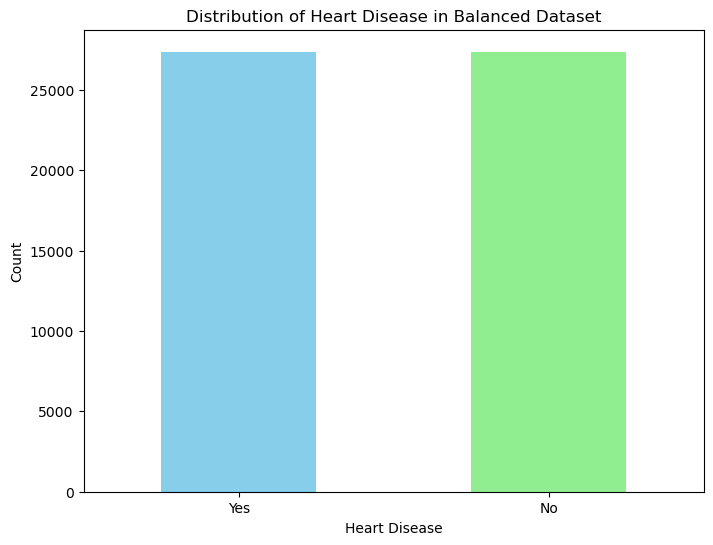

In [90]:
# Visualize the balanced dataset distribution
plt.figure(figsize=(8, 6))
df_balanced['HeartDisease'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Heart Disease in Balanced Dataset')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

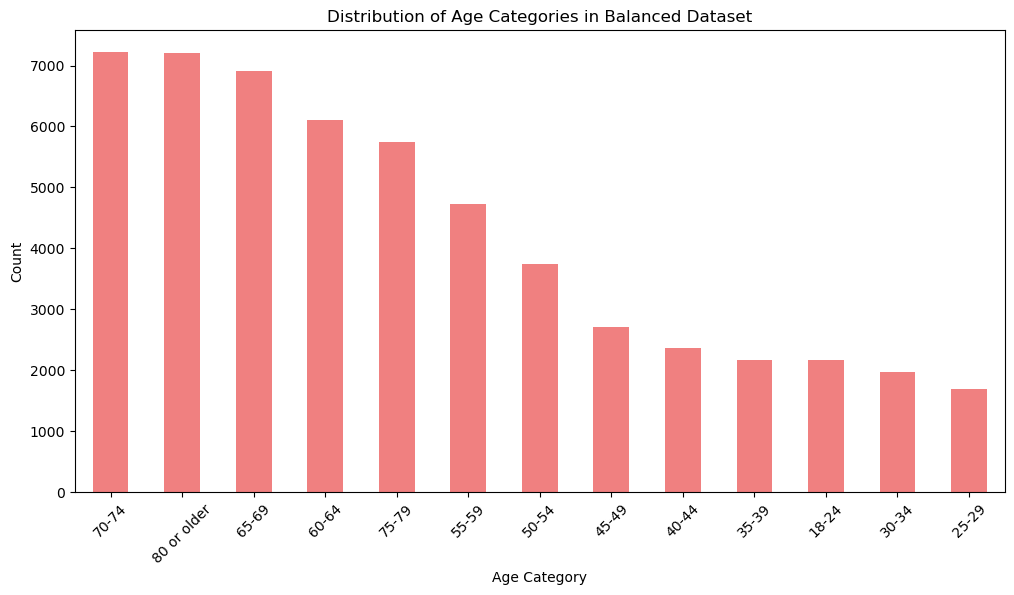

In [91]:
# Distribution of Age Categories
plt.figure(figsize=(12, 6))
df_balanced['AgeCategory'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Age Categories in Balanced Dataset')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

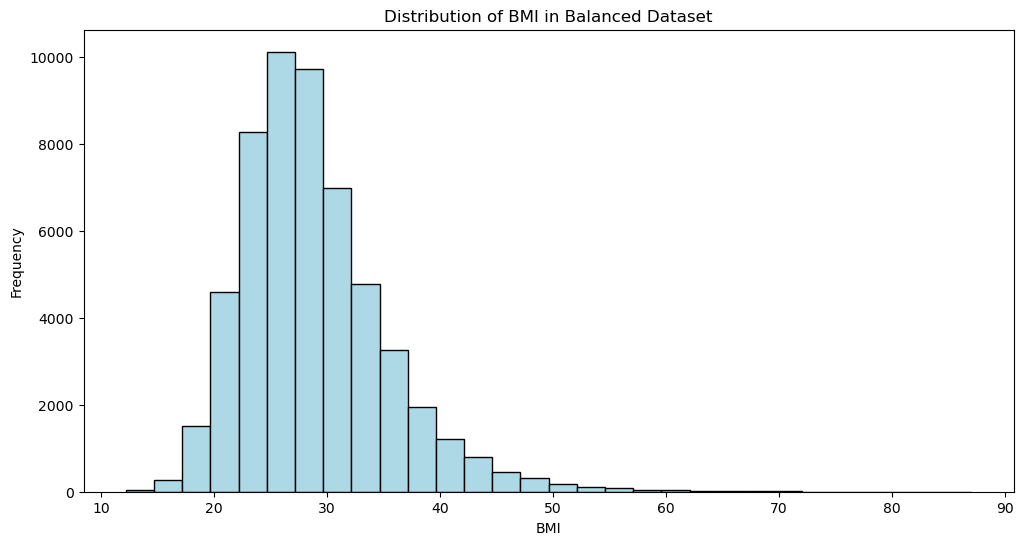

In [92]:
#  Distribution of BMI
plt.figure(figsize=(12, 6))
df_balanced['BMI'].plot(kind='hist', bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of BMI in Balanced Dataset')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

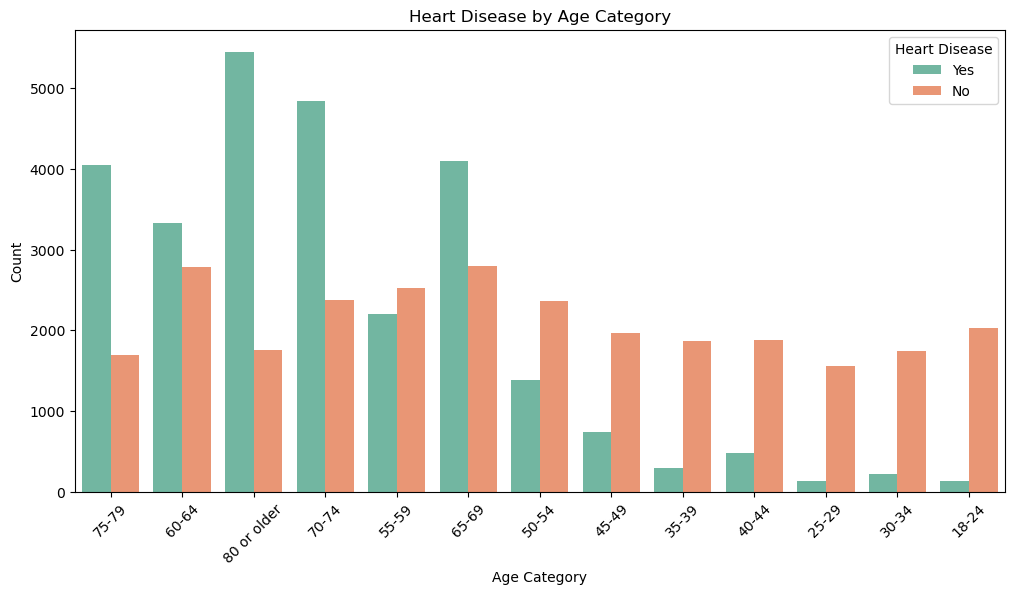

In [93]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_balanced, x='AgeCategory', hue='HeartDisease', palette='Set2')
plt.title('Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Heart Disease')
plt.show()

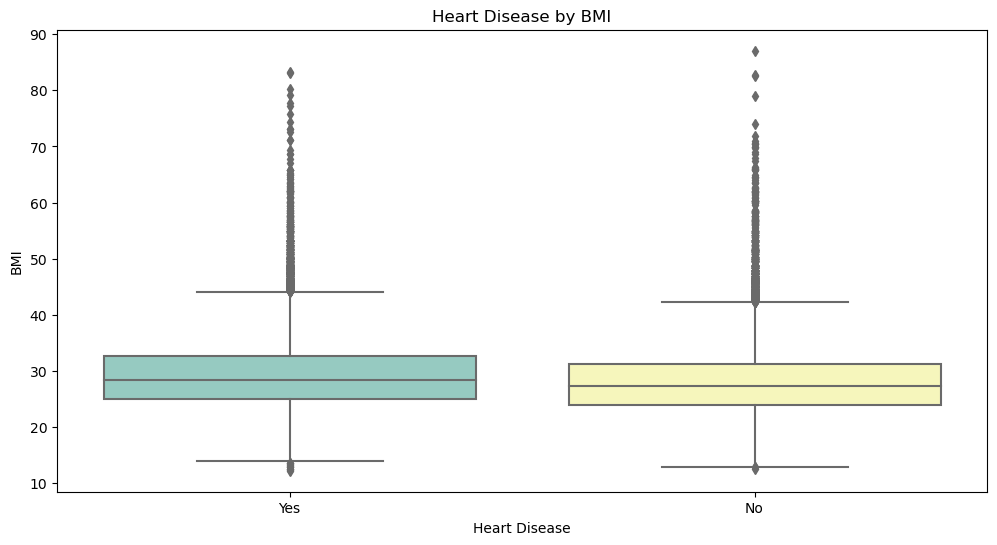

In [94]:
#  Heart Disease vs. BMI
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_balanced, x='HeartDisease', y='BMI', palette='Set3')
plt.title('Heart Disease by BMI')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

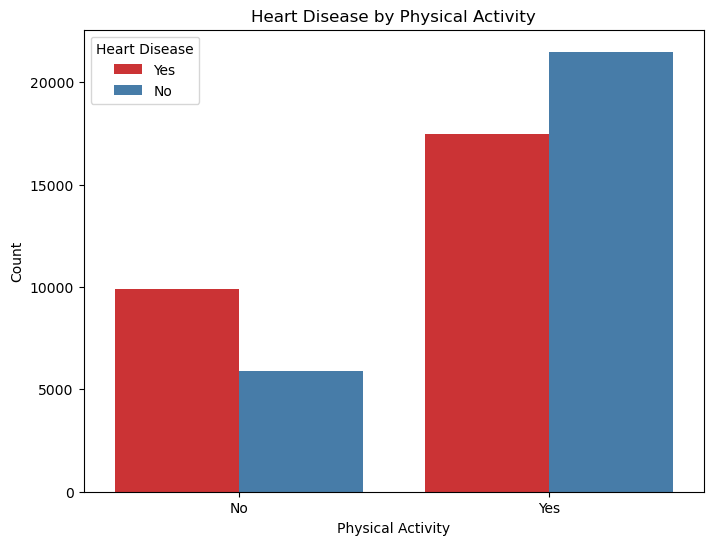

In [95]:
#  Heart Disease vs. Physical Activity
plt.figure(figsize=(8, 6))
sns.countplot(data=df_balanced, x='PhysicalActivity', hue='HeartDisease', palette='Set1')
plt.title('Heart Disease by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

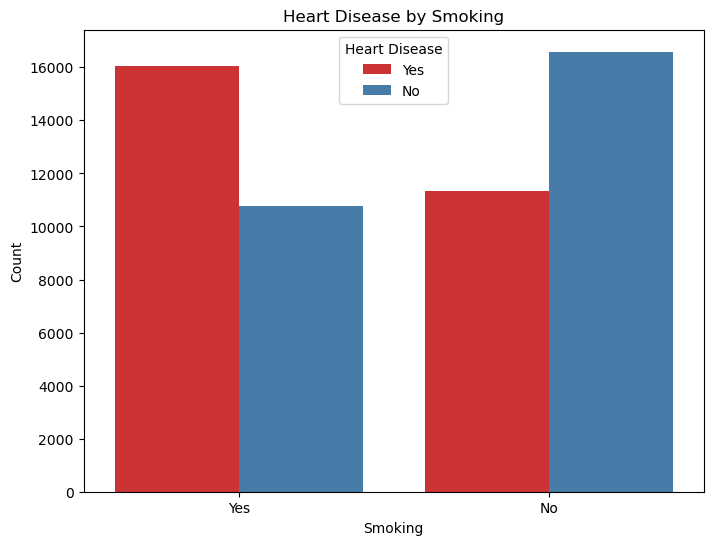

In [96]:
#  Heart Disease vs. Smoking
plt.figure(figsize=(8, 6))
sns.countplot(data=df_balanced, x='Smoking', hue='HeartDisease', palette='Set1')
plt.title('Heart Disease by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()



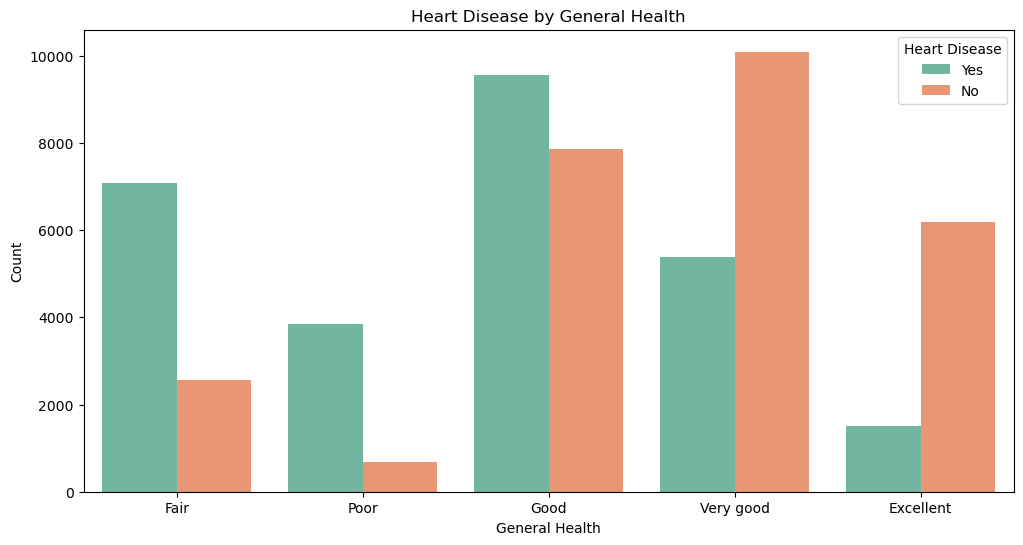

In [97]:

#  Heart Disease vs. General Health
plt.figure(figsize=(12, 6))
sns.countplot(data=df_balanced, x='GenHealth', hue='HeartDisease', palette='Set2')
plt.title('Heart Disease by General Health')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

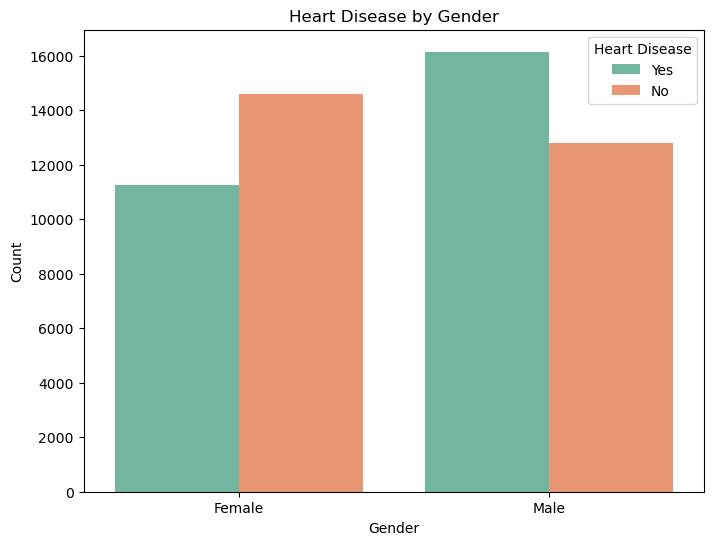

In [98]:
# Distribution of Heart Disease by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df_balanced, x='Sex', hue='HeartDisease', palette='Set2')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

## Modeling Process
- We will now train several machine learning models, including Logistic Regression, Random Forest, XGBoost, and SVM, on the balanced dataset. The models will be evaluated based on accuracy, precision, recall, and F1-score.

In [99]:
# Encode categorical variables
label_encoders = {}
for column in df_balanced.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_balanced[column] = le.fit_transform(df_balanced[column])
    label_encoders[column] = le

# Split the data into features and target
X = df_balanced.drop('HeartDisease', axis=1)
y = df_balanced['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Logistic Regression model with default parameters
baseline_model_default = LogisticRegression(random_state=42)
baseline_model_default.fit(X_train_scaled, y_train)

# Make predictions
y_pred_default = baseline_model_default.predict(X_test_scaled)

# Calculate different performance metrics
accuracy = accuracy_score(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.75
Precision: 0.74
Recall: 0.78
F1-Score: 0.76


In [100]:


# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate different performance metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

rf_accuracy, rf_precision, rf_recall, rf_f1

(0.7443375547978568,
 0.7260180995475113,
 0.7831604636973765,
 0.7535074845905488)

In [101]:


# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate different performance metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

xgb_accuracy, xgb_precision, xgb_recall, xgb_f1

(0.75840233804189, 0.7372320125715569, 0.801464307504576, 0.7680074836295603)

In [102]:


# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate different performance metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

svm_accuracy, svm_precision, svm_recall, svm_f1

(0.7647954213346323,
 0.7406131970673183,
 0.8135448444173277,
 0.7753677967087281)

### Comparing the Baseline Scores
- All the models performed decently well with the svm model having the best overall scores

In [103]:
# Compile the results of all four models into a single dictionary
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM"],
    "Accuracy": [0.7538, 0.7542, 0.7584, 0.7648],
    "Precision": [0.7420, 0.7341, 0.7372, 0.7406],
    "Recall": [0.7764, 0.7955, 0.8015, 0.8135],
    "F1-Score": [0.7589, 0.7636, 0.7680, 0.7754]
}

# Convert to a DataFrame for better visualization
model_results_df = pd.DataFrame(model_results)

model_results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.7538,0.7420,0.7764,0.7589
1,Random Forest,0.7542,0.7341,0.7955,0.7636
2,XGBoost,0.7584,0.7372,0.8015,0.7680
3,SVM,0.7648,0.7406,0.8135,0.7754


In [104]:


# Perform 5-fold cross-validation on the SVM model
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-Validation Accuracy: {cv_mean:.4f} ± {cv_std:.4f}")

Cross-Validation Accuracy: 0.7597 ± 0.0038


### Hyperparameter Tuning
- We use GridSearchCV/RandomizedSearchCV to fine-tune the hyperparameters of our models, aiming to achieve the best performance

In [105]:


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf', 'sigmoid']
}


# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)

print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"Test Precision: {best_precision:.4f}")
print(f"Test Recall: {best_recall:.4f}")
print(f"Test F1-Score: {best_f1:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Test Accuracy: 0.7677
Test Precision: 0.7418
Test Recall: 0.8199
Test F1-Score: 0.7789


In [106]:


# Define base models
estimators = [
    ('svm', SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Define stacking model with a meta-classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Evaluate the stacking model on the test data
y_pred_stack = stacking_model.predict(X_test_scaled)

stack_accuracy = accuracy_score(y_test, y_pred_stack)
stack_precision = precision_score(y_test, y_pred_stack)
stack_recall = recall_score(y_test, y_pred_stack)
stack_f1 = f1_score(y_test, y_pred_stack)

print(f"Stacked Model Test Accuracy: {stack_accuracy:.4f}")
print(f"Stacked Model Test Precision: {stack_precision:.4f}")
print(f"Stacked Model Test Recall: {stack_recall:.4f}")
print(f"Stacked Model Test F1-Score: {stack_f1:.4f}")

Stacked Model Test Accuracy: 0.7680
Stacked Model Test Precision: 0.7485
Stacked Model Test Recall: 0.8056
Stacked Model Test F1-Score: 0.7760


In [107]:
# Define a streamlined parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with a streamlined grid and fewer folds
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', verbose=2, n_jobs=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Use best model for stacking later
best_rf = grid_search_rf.best_estimator_

# Evaluate the fine-tuned Random Forest model on the test data
y_pred_rf = best_rf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"Tuned Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"Tuned Random Forest Test Precision: {rf_precision:.4f}")
print(f"Tuned Random Forest Test Recall: {rf_recall:.4f}")
print(f"Tuned Random Forest Test F1-Score: {rf_f1:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Test Accuracy: 0.7682
Tuned Random Forest Test Precision: 0.7386
Tuned Random Forest Test Recall: 0.8287
Tuned Random Forest Test F1-Score: 0.7811


In [108]:
# Define the streamlined parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost
xgb = XGBClassifier(random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', verbose=2, n_jobs=2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Evaluate the fine-tuned XGBoost model on the test data
y_pred_xgb = best_xgb.predict(X_test_scaled)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print(f"Tuned XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"Tuned XGBoost Test Precision: {xgb_precision:.4f}")
print(f"Tuned XGBoost Test Recall: {xgb_recall:.4f}")
print(f"Tuned XGBoost Test F1-Score: {xgb_f1:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Tuned XGBoost Test Accuracy: 0.7712
Tuned XGBoost Test Precision: 0.7481
Tuned XGBoost Test Recall: 0.8162
Tuned XGBoost Test F1-Score: 0.7807


### Stacking and Voting
- To enhance prediction accuracy, we apply ensemble techniques like stacking and voting. These methods combine the strengths of individual models to improve overall performance.

In [109]:
from sklearn.ensemble import VotingClassifier

# Initialize the models with the best parameters found
xgb = XGBClassifier(random_state=42, **best_params_xgb)
rf = RandomForestClassifier(random_state=42, **best_params_rf)
svm = SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb), ('rf', rf), ('svm', svm)],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted probabilities
)

# Train the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test_scaled)

voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_precision = precision_score(y_test, y_pred_voting)
voting_recall = recall_score(y_test, y_pred_voting)
voting_f1 = f1_score(y_test, y_pred_voting)

print(f"Voting Classifier Test Accuracy: {voting_accuracy:.4f}")
print(f"Voting Classifier Test Precision: {voting_precision:.4f}")
print(f"Voting Classifier Test Recall: {voting_recall:.4f}")
print(f"Voting Classifier Test F1-Score: {voting_f1:.4f}")

Voting Classifier Test Accuracy: 0.7716
Voting Classifier Test Precision: 0.7465
Voting Classifier Test Recall: 0.8209
Voting Classifier Test F1-Score: 0.7819


In [110]:
# Initialize base models
xgb = XGBClassifier(random_state=42, **best_params_xgb)
rf = RandomForestClassifier(random_state=42, **best_params_rf)
svm = SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=42)

# Meta-model (Logistic Regression)
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('xgb', xgb), ('rf', rf), ('svm', svm)],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test_scaled)

stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_precision = precision_score(y_test, y_pred_stacking)
stacking_recall = recall_score(y_test, y_pred_stacking)
stacking_f1 = f1_score(y_test, y_pred_stacking)

print(f"Stacking Classifier Test Accuracy: {stacking_accuracy:.4f}")
print(f"Stacking Classifier Test Precision: {stacking_precision:.4f}")
print(f"Stacking Classifier Test Recall: {stacking_recall:.4f}")
print(f"Stacking Classifier Test F1-Score: {stacking_f1:.4f}")


Stacking Classifier Test Accuracy: 0.7706
Stacking Classifier Test Precision: 0.7493
Stacking Classifier Test Recall: 0.8118
Stacking Classifier Test F1-Score: 0.7793


### Potential improvement
- At this point in the modeling process, the scores only seem to be improving marginally so I decided it might be a good idea to use more of the data instead of just the sampled data used above

In [111]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 5 to 104542
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  int32  
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  int32  
 3   AlcoholDrinking   54746 non-null  int32  
 4   Stroke            54746 non-null  int32  
 5   PhysicalHealth    54746 non-null  int64  
 6   MentalHealth      54746 non-null  int64  
 7   DiffWalking       54746 non-null  int32  
 8   Sex               54746 non-null  int32  
 9   AgeCategory       54746 non-null  int32  
 10  Race              54746 non-null  int32  
 11  Diabetic          54746 non-null  int32  
 12  PhysicalActivity  54746 non-null  int32  
 13  GenHealth         54746 non-null  int32  
 14  SleepTime         54746 non-null  int64  
 15  Asthma            54746 non-null  int32  
 16  KidneyDisease     54746 non-null  int32

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Full Data Modeling
- I decided to use the entire dataset now and used SMOTE to balance the data to see if more data would help add to the models

In [113]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X_original = df.drop(columns=['HeartDisease'])  # Replace 'HeartDisease' with your target column name if different
y_original = df['HeartDisease']  # Replace 'HeartDisease' with your target column name if different

# Apply SMOTE to balance the original dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_original_resampled, y_original_resampled = smote.fit_resample(X_original, y_original)

# Split the resampled original data into training and test sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original_resampled, y_original_resampled, test_size=0.2, random_state=42)

# Re-scale the data
scaler = StandardScaler()
X_train_scaled_original = scaler.fit_transform(X_train_original)
X_test_scaled_original = scaler.transform(X_test_original)

# Re-train the XGBoost model on the resampled original dataset
xgb_model_original = XGBClassifier(random_state=42)
xgb_model_original.fit(X_train_scaled_original, y_train_original)

# Evaluate the model on the test set
y_pred_original = xgb_model_original.predict(X_test_scaled_original)

original_accuracy = accuracy_score(y_test_original, y_pred_original)
original_precision = precision_score(y_test_original, y_pred_original)
original_recall = recall_score(y_test_original, y_pred_original)
original_f1 = f1_score(y_test_original, y_pred_original)

print(f"Original Dataset Test Accuracy: {original_accuracy:.4f}")
print(f"Original Dataset Test Precision: {original_precision:.4f}")
print(f"Original Dataset Test Recall: {original_recall:.4f}")
print(f"Original Dataset Test F1-Score: {original_f1:.4f}")

Original Dataset Test Accuracy: 0.7936
Original Dataset Test Precision: 0.7755
Original Dataset Test Recall: 0.8266
Original Dataset Test F1-Score: 0.8002


In [114]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost
xgb = XGBClassifier(random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', verbose=2, n_jobs=2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled_original, y_train_original)

# Get the best parameters
best_params_xgb_new = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost on the updated dataset: {best_params_xgb_new}")

# Evaluate the best model on the test data
best_xgb_model_new = grid_search_xgb.best_estimator_
y_pred_best_xgb_new = best_xgb_model_new.predict(X_test_scaled_original)

best_xgb_accuracy_new = accuracy_score(y_test_original, y_pred_best_xgb_new)
best_xgb_precision_new = precision_score(y_test_original, y_pred_best_xgb_new)
best_xgb_recall_new = recall_score(y_test_original, y_pred_best_xgb_new)
best_xgb_f1_new = f1_score(y_test_original, y_pred_best_xgb_new)

print(f"Best Params (XGBoost) Test Accuracy: {best_xgb_accuracy_new:.4f}")
print(f"Best Params (XGBoost) Test Precision: {best_xgb_precision_new:.4f}")
print(f"Best Params (XGBoost) Test Recall: {best_xgb_recall_new:.4f}")
print(f"Best Params (XGBoost) Test F1-Score: {best_xgb_f1_new:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost on the updated dataset: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Params (XGBoost) Test Accuracy: 0.8138
Best Params (XGBoost) Test Precision: 0.7950
Best Params (XGBoost) Test Recall: 0.8456
Best Params (XGBoost) Test F1-Score: 0.8195


#### The scores for the XGBoost model seemed to have improved from the whole dataset

In [115]:

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_original, y_pred_best_xgb_new)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test_original, y_pred_best_xgb_new)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[45736 12749]
 [ 9031 49453]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     58485
           1       0.80      0.85      0.82     58484

    accuracy                           0.81    116969
   macro avg       0.82      0.81      0.81    116969
weighted avg       0.82      0.81      0.81    116969



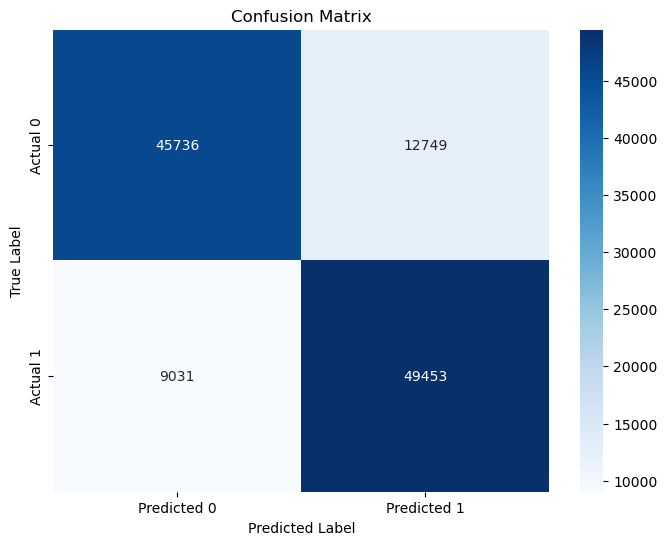

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [117]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_original, y_train_original)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled_original)

# Calculate performance metrics
rf_accuracy = accuracy_score(y_test_original, y_pred_rf)
rf_precision = precision_score(y_test_original, y_pred_rf)
rf_recall = recall_score(y_test_original, y_pred_rf)
rf_f1 = f1_score(y_test_original, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Test Precision: {rf_precision:.4f}")
print(f"Random Forest Test Recall: {rf_recall:.4f}")
print(f"Random Forest Test F1-Score: {rf_f1:.4f}")

Random Forest Test Accuracy: 0.8843
Random Forest Test Precision: 0.8651
Random Forest Test Recall: 0.9107
Random Forest Test F1-Score: 0.8873


In [118]:




# Define a parameter grid for RandomizedSearchCV
param_grid_rf_small = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV with the existing Random Forest model
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,  # Use the existing rf_model
    param_distributions=param_grid_rf_small,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train_scaled_original, y_train_original)

# Get the best parameters
best_params_rf = random_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Evaluate the best Random Forest model on the test data
best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled_original)

best_rf_accuracy = accuracy_score(y_test_original, y_pred_best_rf)
best_rf_precision = precision_score(y_test_original, y_pred_best_rf)
best_rf_recall = recall_score(y_test_original, y_pred_best_rf)
best_rf_f1 = f1_score(y_test_original, y_pred_best_rf)

print(f"Tuned Random Forest Test Accuracy: {best_rf_accuracy:.4f}")
print(f"Tuned Random Forest Test Precision: {best_rf_precision:.4f}")
print(f"Tuned Random Forest Test Recall: {best_rf_recall:.4f}")
print(f"Tuned Random Forest Test F1-Score: {best_rf_f1:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Tuned Random Forest Test Accuracy: 0.8814
Tuned Random Forest Test Precision: 0.8620
Tuned Random Forest Test Recall: 0.9082
Tuned Random Forest Test F1-Score: 0.8845


#### The scores of the Random Forest model improved dramatically when using the entire dataset, things are looking good

In [119]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_original, y_pred_best_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Classification Report
class_report_rf = classification_report(y_test_original, y_pred_best_rf)
print("\nClassification Report:")
print(class_report_rf)


Confusion Matrix:
[[49981  8504]
 [ 5370 53114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     58485
           1       0.86      0.91      0.88     58484

    accuracy                           0.88    116969
   macro avg       0.88      0.88      0.88    116969
weighted avg       0.88      0.88      0.88    116969



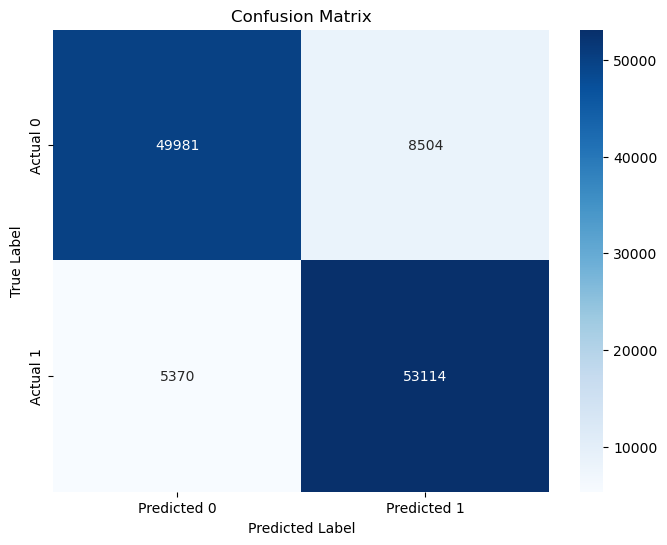

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Now we will stack these models like we did earlier so we can combine the strengths of both models

In [121]:
# Define the base learners (tuned XGBoost and Random Forest)
estimators = [
    ('xgb', best_xgb_model_new),  # The tuned XGBoost model
    ('rf', best_rf_model)         # The tuned Random Forest model
]

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),  # Meta-model
    cv=5  # Use cross-validation to train the meta-model
)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled_original, y_train_original)

# Make predictions on the test data
y_pred_stacking = stacking_clf.predict(X_test_scaled_original)

# Calculate performance metrics
stacking_accuracy = accuracy_score(y_test_original, y_pred_stacking)
stacking_precision = precision_score(y_test_original, y_pred_stacking)
stacking_recall = recall_score(y_test_original, y_pred_stacking)
stacking_f1 = f1_score(y_test_original, y_pred_stacking)

print(f"Stacked Model Test Accuracy: {stacking_accuracy:.4f}")
print(f"Stacked Model Test Precision: {stacking_precision:.4f}")
print(f"Stacked Model Test Recall: {stacking_recall:.4f}")
print(f"Stacked Model Test F1-Score: {stacking_f1:.4f}")

Stacked Model Test Accuracy: 0.8819
Stacked Model Test Precision: 0.8730
Stacked Model Test Recall: 0.8938
Stacked Model Test F1-Score: 0.8833


In [122]:
# Define a parameter grid for Logistic Regression as the meta-model
param_grid_meta = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Different solvers for optimization
    'max_iter': [100, 200, 300]  # Number of iterations for convergence
}

# Set up GridSearchCV for the meta-model
grid_search_meta = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_meta,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Replace the current meta-model with the tuned one
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=grid_search_meta,
    cv=5
)

# Train the stacking classifier with the tuned meta-model
stacking_clf.fit(X_train_scaled_original, y_train_original)

# Evaluate the tuned stacking model
y_pred_stacking_tuned = stacking_clf.predict(X_test_scaled_original)

tuned_stacking_accuracy = accuracy_score(y_test_original, y_pred_stacking_tuned)
tuned_stacking_precision = precision_score(y_test_original, y_pred_stacking_tuned)
tuned_stacking_recall = recall_score(y_test_original, y_pred_stacking_tuned)
tuned_stacking_f1 = f1_score(y_test_original, y_pred_stacking_tuned)

print(f"Tuned Stacked Model Test Accuracy: {tuned_stacking_accuracy:.4f}")
print(f"Tuned Stacked Model Test Precision: {tuned_stacking_precision:.4f}")
print(f"Tuned Stacked Model Test Recall: {tuned_stacking_recall:.4f}")
print(f"Tuned Stacked Model Test F1-Score: {tuned_stacking_f1:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuned Stacked Model Test Accuracy: 0.8819
Tuned Stacked Model Test Precision: 0.8731
Tuned Stacked Model Test Recall: 0.8937
Tuned Stacked Model Test F1-Score: 0.8833


#### The scores are rather similar to the Random Forest model, but the stacked model has less false negatives which is what we want for something such as predicting heart disease.

In [123]:
conf_matrix_stacked = confusion_matrix(y_test_original, y_pred_stacking_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_stacked)


Confusion Matrix:
[[50886  7599]
 [ 6214 52270]]


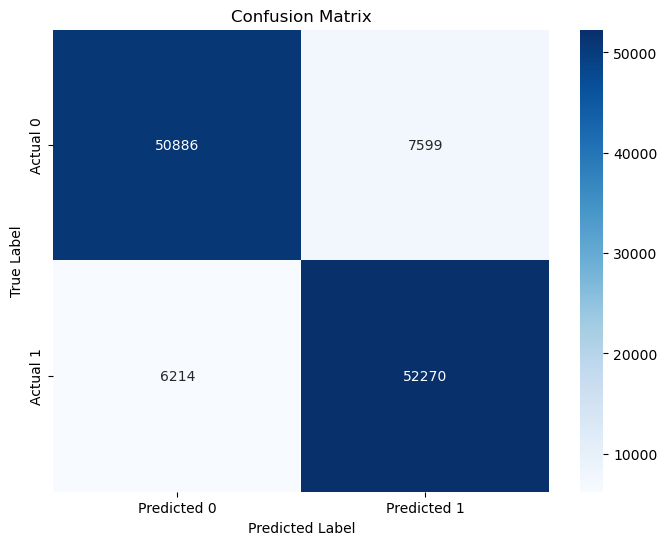

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacked, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### I attempted to use weighted averaging to see if it would improve the modeling but the scores overall seemed to drop so i decided to stick with the stacked model

In [125]:
# Define the weights for each model
weight_xgb = 0.5
weight_rf = 0.5

# Compute weighted average of the predictions
y_pred_weighted_probs = (weight_xgb * best_xgb_model_new.predict_proba(X_test_scaled_original)[:, 1] +
                         weight_rf * best_rf_model.predict_proba(X_test_scaled_original)[:, 1])

# Convert probabilities back to binary predictions
y_pred_weighted = np.where(y_pred_weighted_probs > 0.5, 1, 0)

# Calculate performance metrics
weighted_accuracy = accuracy_score(y_test_original, y_pred_weighted)
weighted_precision = precision_score(y_test_original, y_pred_weighted)
weighted_recall = recall_score(y_test_original, y_pred_weighted)
weighted_f1 = f1_score(y_test_original, y_pred_weighted)

print(f"Weighted Averaging Model Test Accuracy: {weighted_accuracy:.4f}")
print(f"Weighted Averaging Model Test Precision: {weighted_precision:.4f}")
print(f"Weighted Averaging Model Test Recall: {weighted_recall:.4f}")
print(f"Weighted Averaging Model Test F1-Score: {weighted_f1:.4f}")

Weighted Averaging Model Test Accuracy: 0.8682
Weighted Averaging Model Test Precision: 0.8439
Weighted Averaging Model Test Recall: 0.9036
Weighted Averaging Model Test F1-Score: 0.8727


#### The visuals below show the comparisons of all of the models. It shows that the Random Forest and Stacked Model performed best overall, but once again we go with the stacked model because of its lower false negative values.

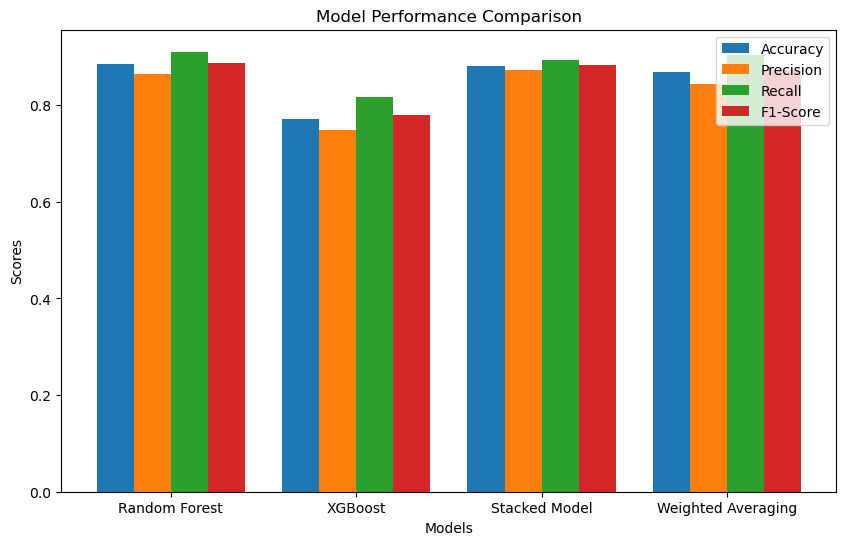

In [126]:

models = ['Random Forest', 'XGBoost', 'Stacked Model', 'Weighted Averaging']

accuracy_scores = [rf_accuracy, xgb_accuracy, stacking_accuracy, weighted_accuracy]
precision_scores = [rf_precision, xgb_precision, stacking_precision, weighted_precision]
recall_scores = [rf_recall, xgb_recall, stacking_recall, weighted_recall]
f1_scores = [rf_f1, xgb_f1, stacking_f1, weighted_f1]

# Bar chart for performance comparison
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

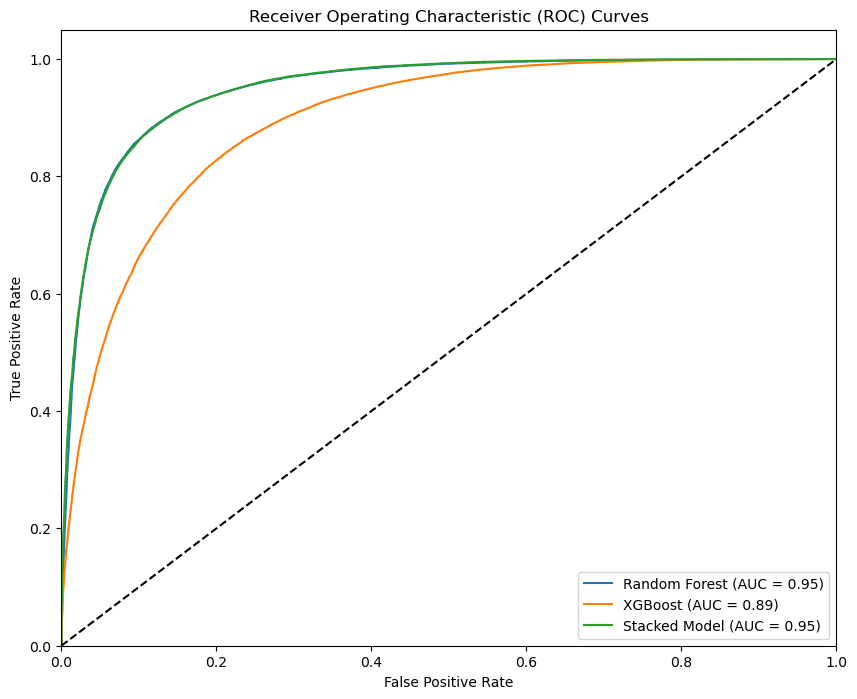

In [127]:


plt.figure(figsize=(10, 8))

# ROC Curve for Random Forest
y_pred_rf_proba = best_rf_model.predict_proba(X_test_scaled_original)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_original, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# ROC Curve for XGBoost
y_pred_xgb_proba = best_xgb_model_new.predict_proba(X_test_scaled_original)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_original, y_pred_xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# ROC Curve for Stacked Model
y_pred_stacking_proba = stacking_clf.predict_proba(X_test_scaled_original)[:, 1]
fpr_stacking, tpr_stacking, _ = roc_curve(y_test_original, y_pred_stacking_proba)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacked Model (AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

<Figure size 600x600 with 0 Axes>

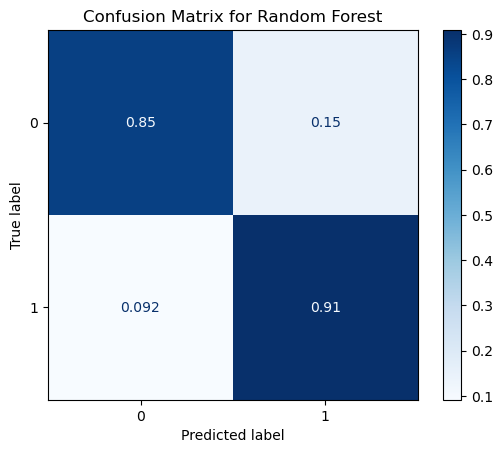

<Figure size 600x600 with 0 Axes>

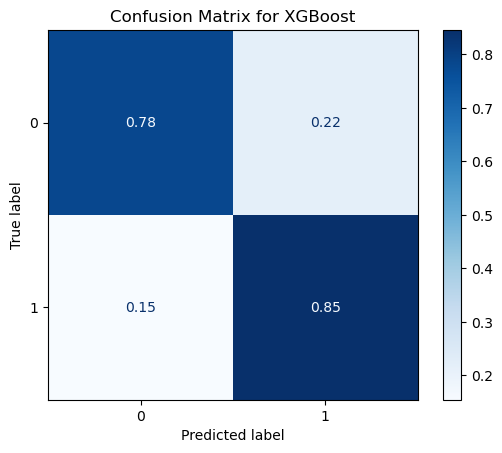

<Figure size 600x600 with 0 Axes>

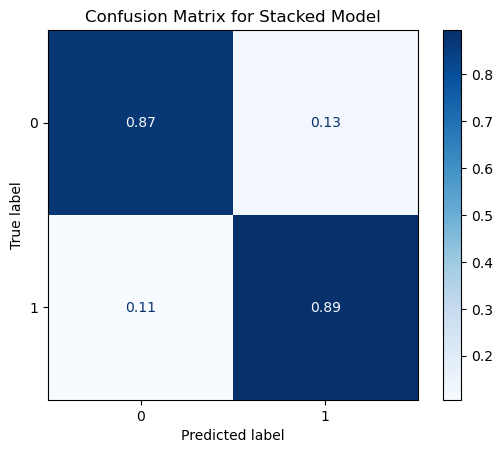

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay


# Confusion matrix for Random Forest
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_scaled_original, y_test_original, cmap='Blues', normalize='true')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Confusion matrix for XGBoost
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(best_xgb_model_new, X_test_scaled_original, y_test_original, cmap='Blues', normalize='true')
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Confusion matrix for Stacked Model
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test_scaled_original, y_test_original, cmap='Blues', normalize='true')
plt.title('Confusion Matrix for Stacked Model')
plt.show()

In [129]:

model_filename = 'stacked_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(stacking_clf, file)

print(f"Model saved as {model_filename}")

Model saved as stacked_model.pkl


#### As a last attempt to improve the model, I introduced L2 regularization to penalize the weights for better predictions. The scores came out similar and I decided to go with this one just for the added regularization

In [130]:
# Define the base learners (existing tuned XGBoost and Random Forest models)
estimators = [
    ('xgb', best_xgb_model_new),  # The tuned XGBoost model
    ('rf', best_rf_model)         # The tuned Random Forest model
]

# Define the meta-model with L1 or L2 regularization
meta_model = LogisticRegression(
    random_state=42, 
    penalty='l2',  
    solver='liblinear',  
    C=1.0  
)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,  # The meta-model with regularization
    cv=5  # Cross-validation for training the meta-model
)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled_original, y_train_original)

# Evaluate the stacked model on the test data
y_pred_stacking = stacking_clf.predict(X_test_scaled_original)
stacking_accuracy = accuracy_score(y_test_original, y_pred_stacking)
stacking_precision = precision_score(y_test_original, y_pred_stacking)
stacking_recall = recall_score(y_test_original, y_pred_stacking)
stacking_f1 = f1_score(y_test_original, y_pred_stacking)

print(f"Stacked Model with Regularization Test Accuracy: {stacking_accuracy:.4f}")
print(f"Stacked Model with Regularization Test Precision: {stacking_precision:.4f}")
print(f"Stacked Model with Regularization Test Recall: {stacking_recall:.4f}")
print(f"Stacked Model with Regularization Test F1-Score: {stacking_f1:.4f}")

Stacked Model with Regularization Test Accuracy: 0.8819
Stacked Model with Regularization Test Precision: 0.8730
Stacked Model with Regularization Test Recall: 0.8938
Stacked Model with Regularization Test F1-Score: 0.8833


#### We now pickle the final model to use in streamlit to make the predictor app

In [131]:
# Save the regularized stacked model to a file
model_filename = 'final_stacked_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(stacking_clf, file)

print(f"Model saved as {model_filename}")

Model saved as final_stacked_model.pkl


# Conclusions and Recommendations
- __Targeted Interventions:__ By identifying high-risk individuals based on these key predictors, healthcare providers can implement targeted interventions, such as personalized exercise programs, dietary plans, and regular health check-ups.


- __Resource Allocation:__ Predictive models can help healthcare systems allocate resources more effectively by focusing on high-risk patients, potentially reducing hospital admissions and healthcare costs associated with advanced heart disease treatment.


- __Preventive Healthcare:__ Emphasizing preventive care, such as lifestyle modification and early detection through predictive analytics, can significantly reduce the burden of heart disease on the healthcare system.


__These conclusions suggest that healthcare providers can benefit greatly from incorporating predictive analytics into their preventive care strategies, ultimately leading to better patient outcomes and more efficient use of healthcare resources.__